# Analysis of the data obtained from OpenAgrar

In [1]:
import pandas as pd

In [12]:
openagrar = pd.read_csv("output.csv", sep="|")

In [1]:
openagrar.to_excel("output.xlsx")

NameError: name 'openagrar' is not defined

In [32]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import json
from collections import Counter

In [14]:
openagrar.head()

,ID,title,abstract_text,publisher,publication_year,institute,authors_names,subjects,language
0,48384,Sainfoin seeds as protein source for weaned pi...,"""Sainfoin (Onobrychis viciifolia) has been use...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Sainfoin', 'protein', 'piglets', 'legume']",en
1,47994,Prevalence of udder infections and effects on ...,"""The objective of this study was to investigat...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['dairy goat', 'staphylococci', 'SCC', 'milk y...",en
2,46402,Lachgasemissionen beim Rapsanbau,"""Nitrous oxide (N2O) emissions were countinuou...",FAL,1998,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Schadstoff', 'Rapsöl', 'Biokraftstoff', 'Met...",de
3,39336,Haltungseinflüsse auf die Fleischbeschaffenhei...,"""Animal housing as influence on pork quality h...",FAL,1999,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Schwein', 'Fleischbeschaffenheit', 'Schweine...",de
4,39069,Application of near infrared reflectance spect...,"""With reference to applications in forage anal...",FAL,1991,ti,"{'creatorName': {'@nameType': 'Personal', '#te...","['Infrarotstrahlung', 'Futter', 'Qualität', 'G...",en


In [15]:
openagrar['language'].value_counts().reset_index()

,language,count
0,en,9236
1,de,2708
2,fr,12
3,hu,9
4,tr,8
5,sl,8
6,pt,8
7,el,8
8,bg,8
9,cs,6


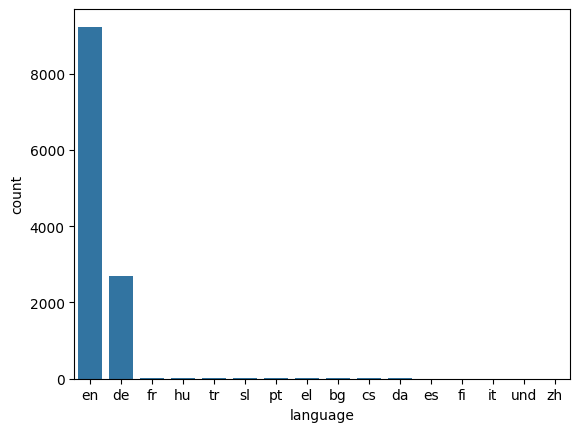

In [16]:
# define Seaborn color palette to use 
sns.barplot(x="language",
           y="count",
           data=openagrar['language'].value_counts().reset_index())
# displaying chart 
plt.show()

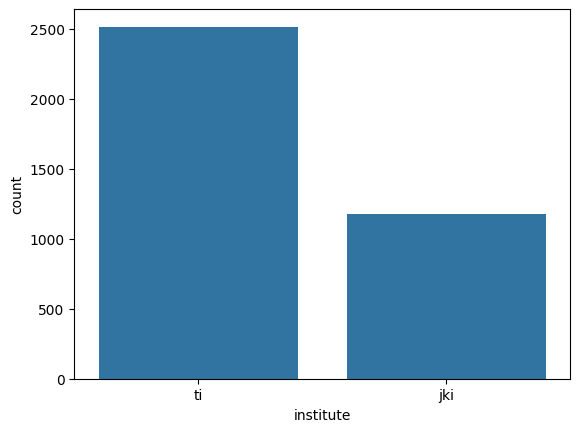

In [88]:
# define Seaborn color palette to use 
sns.barplot(x="institute",
           y="count",
           data=filtered_df['institute'].value_counts().reset_index())
# displaying chart 
plt.show()

In [89]:
filtered_df['institute'].value_counts().reset_index().head(10)

,institute,count
0,ti,2516
1,jki,1177


In [97]:
subjects = filtered_df['subjects']
all_subjects = []
counter = 0
for sub in subjects: 
    try:
        if isinstance(sub, str):
            data = ast.literal_eval(sub.lower())
            if not isinstance(data, dict):
                all_subjects.extend(data)
                for h in data: 
                    if 'soil' in str(h):
                        coounter += 1
                        break
    except:
        #print(sub)
        continue
print(counter)

0


In [83]:
final_subjects = []
for i in all_subjects:
    if isinstance(i, dict):
        continue
    else:
        final_subjects.append(i)

In [84]:
subjects_conter= Counter(final_subjects)

In [85]:
isinstance(subjects_conter, dict)

True

In [92]:
total_soil_mentions = 0
for i, val in zip(subjects_conter.keys(), subjects_conter.values()):
    if 'crop' in i:
        print(i, val)
        total_soil_mentions += val
print(f'Total soil mentions = {total_soil_mentions}')

catch crop 2
temperate cropland 1
cropland 4
crop diversification 7
crop protection 4
microphenotyping 1
intercropping 6
biomass crop 1
alley-cropping system 1
crop phenology 1
crop rotation 9
cover crop 2
crop models 1
vegetable crops 1
maize cropping 2
crop yield 6
crop 2
alley cropping 6
crop development 1
annual crop mapping 1
microplastics 4
crop wild relatives 8
crop litter 1
crop types 1
cropping system 1
maize mixed cropping 1
perennial biomass crop 1
low-noise microphone 1
microphone array 1
crop monitoring 2
crop traits 1
winter cover crop 2
alley cropping agroforestry 1
grain crops 1
crop breeding 1
crop farms 1
cover crops 3
croplands 1
crop epigenome 1
diversified cropping systems 1
patch cropping 1
phytoseiid mitesviticulturepesticidesfungicidescover cropstyphlodromus pyri 1
cruciferous crops 1
crop improvement 3
crop production 1
crop protection products 1
crop loss 1
crop cover 1
alley-cropping systems 1
catch crops 1
solanum crop 1
tree-based intercropping 1
sustainabl

In [62]:
subjects_conter.most_common()

[('monitoring', 116),
 ('climate change', 102),
 ('germany', 78),
 ('life cycle assessment', 66),
 ('biodiversity', 62),
 ('sustainable building assessment', 62),
 ('wood products', 62),
 ('agriculture', 61),
 ('deutschland', 49),
 ('genetic diversity', 37),
 ('resistance', 36),
 ('fische', 36),
 ('klimawandel', 33),
 ('kliesche', 33),
 ('animal welfare', 29),
 ('survey', 29),
 ('dorschartige', 29),
 ('vitis vinifera', 29),
 ('sustainability', 28),
 ('baltic sea', 28),
 ('biological control', 27),
 ('soil organic carbon', 26),
 ('ecosystem services', 26),
 ('biomass', 25),
 ('hering', 25),
 ('landwirtschaft', 24),
 ('common agricultural policy', 24),
 ('grapevine', 24),
 ('food waste', 23),
 ('north sea', 22),
 ('europe', 22),
 ('rural areas', 22),
 ('wheat', 21),
 ('carbon sequestration', 21),
 ('risk assessment', 21),
 ('rural development', 20),
 ('bioeconomy', 20),
 ('machine learning', 20),
 ('viticulture', 20),
 ('risk-based surveillance', 20),
 ('remote sensing', 19),
 ('plant pe

In [7]:
# Filter out rows that do not contain 'en'
#filtered_df = openagrar[openagrar['language'].str.contains('en', case=False, na=False)]

In [26]:
filtered_df = openagrar[openagrar['institute'].str.contains('ti|jki', case=False, na=False)]

In [27]:
len(filtered_df)

4576

In [28]:
filtered_df.head()

,ID,title,abstract_text,publisher,publication_year,institute,authors_names,subjects,language
0,48384,Sainfoin seeds as protein source for weaned pi...,"""Sainfoin (Onobrychis viciifolia) has been use...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Sainfoin', 'protein', 'piglets', 'legume']",en
1,47994,Prevalence of udder infections and effects on ...,"""The objective of this study was to investigat...",vTI,2012,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['dairy goat', 'staphylococci', 'SCC', 'milk y...",en
2,46402,Lachgasemissionen beim Rapsanbau,"""Nitrous oxide (N2O) emissions were countinuou...",FAL,1998,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Schadstoff', 'Rapsöl', 'Biokraftstoff', 'Met...",de
3,39336,Haltungseinflüsse auf die Fleischbeschaffenhei...,"""Animal housing as influence on pork quality h...",FAL,1999,ti,"[{'creatorName': {'@nameType': 'Personal', '#t...","['Schwein', 'Fleischbeschaffenheit', 'Schweine...",de
4,39069,Application of near infrared reflectance spect...,"""With reference to applications in forage anal...",FAL,1991,ti,"{'creatorName': {'@nameType': 'Personal', '#te...","['Infrarotstrahlung', 'Futter', 'Qualität', 'G...",en


Show the distributions of years and the distributions of institutes

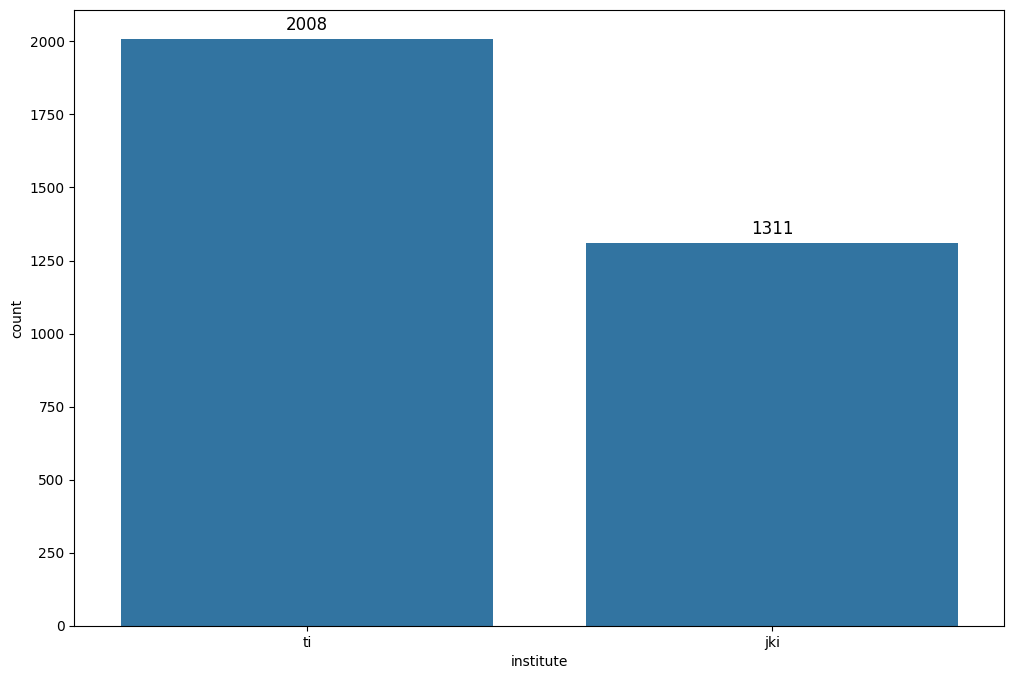

In [72]:
# define Seaborn color palette to use 
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="institute",
           y="count",
           data=filtered_df['institute'].value_counts().reset_index())

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# displaying chart 
plt.show()

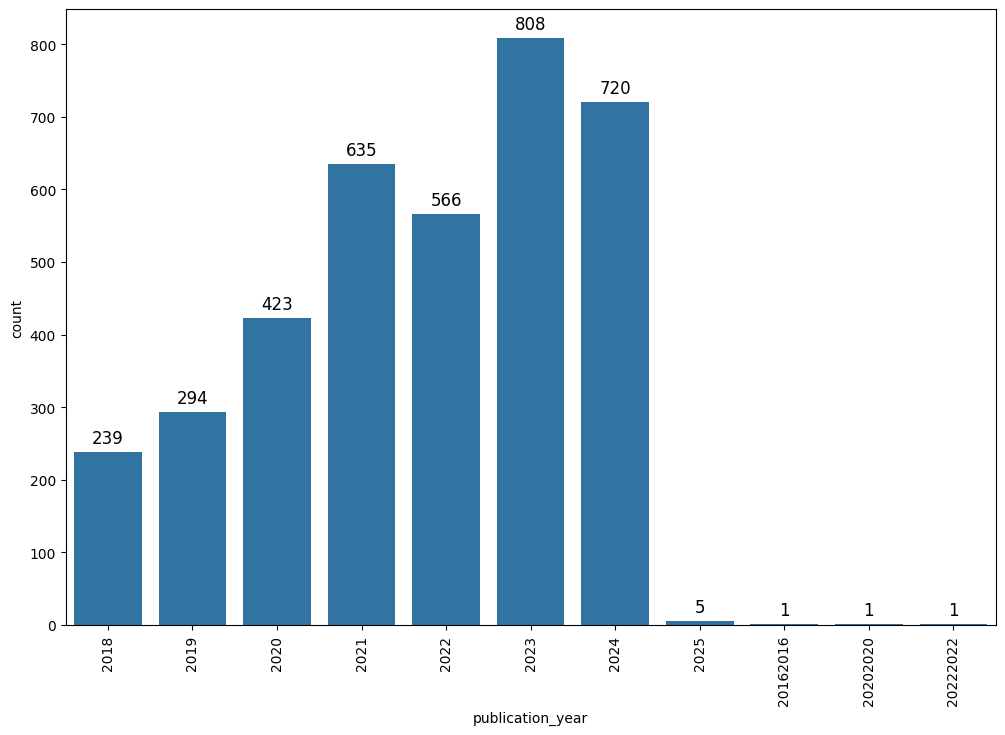

In [81]:
# Set the figure size to make the plot fill the notebook cell
plt.figure(figsize=(12, 8))

# Create the barplot
ax = sns.barplot(x="publication_year", y="count", data=filtered_df['publication_year'].value_counts().reset_index())

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # The value to display
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of the text (x, y)
        ha='center', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 10), textcoords='offset points'  # Offset the text slightly above the bar
    )
# Display the chart
plt.show()

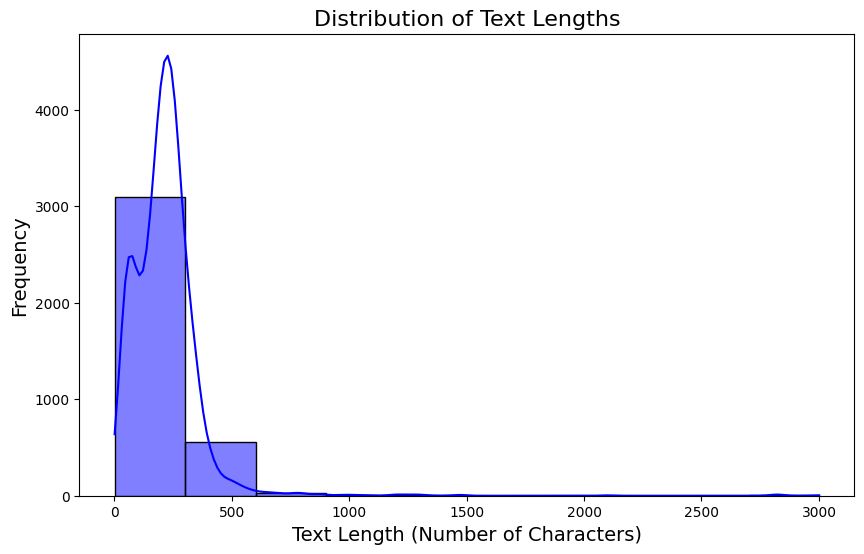

In [90]:
# Set up the figure size for the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of text lengths directly using apply() within sns.histplot
sns.histplot(filtered_df['abstract_text'].apply(lambda x: len(x.split(' '))), kde=True, color='blue', bins=10)

# Add labels and title
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length (Number of Characters)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

In [98]:
filtered_file = "/home/abdelmalak/Documents/FairAgro UC/repo/pilot-uc-textmining-metadata/data/OpenAgrar/outputs/final.csv"
filtered_df.to_csv(filtered_file, sep='|')

In [80]:
filtered_df = filtered_df[filtered_df['publication_year']>=2018]

In [17]:
len(filtered_df)

3670